In [ ]:
#pip install networkx

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re


In [ ]:
f_input = open('input.txt', 'r')
enigma_input=f_input.read()
enigma_input=enigma_input.lower()
enigma_input=re.sub('[^a-z]', '', enigma_input)
txt_len=len(enigma_input)
full_text=enigma_input
enigma_input=enigma_input[:txt_len]
print(enigma_input)

theruinsofthegrottenburgacastlebuiltintoanaturallyoccurringcavemarmelsarelocatedontworockypointshigh


In [ ]:
f_output = open('output.txt', 'r')
enigma_output=f_output.read()
enigma_output=enigma_output.lower()
enigma_output=re.sub('[^a-z]', '', enigma_output)
cypher=enigma_output
enigma_output=enigma_output[:txt_len]
print(enigma_output)

httinsjrwnozbsegvyrdybnykeijigkrjhreohfkxbewlmkukklpskqangdhfesjbhvrsfdslrvvmpizpyghwqctzxhwsdvodvqz


In [ ]:
df = pd.DataFrame(columns = ['source', 'target', 'count'])
graph_labels={}
for i in range(100):
  df.loc[i]=[enigma_input[i],enigma_output[i], i]
  if (txt_len<=30):
    df.loc[txt_len+i]=[enigma_output[i],enigma_input[i], i]
  graph_labels[(enigma_input[i],enigma_output[i])]=i
df

,source,target,count
0,t,h,0
1,h,t,1
2,e,t,2
3,r,i,3
4,u,n,4
...,...,...,...
95,s,o,95
96,h,d,96
97,i,v,97
98,g,q,98


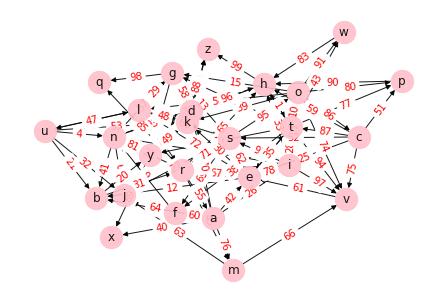

[['m', 'v', 'e', 'i', 'n', 'g', 's', 'o', 'l', 'u', 'b', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'g', 's', 'o', 'l', 'u', 'b', 'r'], ['m', 'v', 'e', 'i', 'n', 'g', 's', 'o', 'l', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'g', 's', 'o', 'l', 'r'], ['m', 'v', 'e', 'i', 'n', 'g', 's', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'g', 's', 'r'], ['m', 'v', 'e', 'i', 'n', 'b', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'b', 'r'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'g', 's', 'o', 'l', 'u', 'b', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'g', 's', 'o', 'l', 'u', 'b', 'r'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'g', 's', 'o', 'l', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'g', 's', 'o', 'l', 'r'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'g', 's', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'g', 's', 'r'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'o', 'c', 's', 'r', 'a'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'o', 'c', 's', 'r'], ['m', 'v', 'e', 'i', 'n', 'h', 't', 'o', 'l', 's', 'r', 'a'], ['m', 'v', 'e', 'i', 'n',

In [ ]:
G=nx.from_pandas_edgelist(df, edge_attr=True, create_using=nx.DiGraph())
pos = nx.kamada_kawai_layout(G)
plt.figure()    
nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=graph_labels,font_color='red')
plt.axis('off')
plt.show()
cycles = list(nx.simple_cycles(G))
print(cycles)

In [ ]:
rotors = ['ekmflgdqvzntowyhxuspaibrcj','ajdksiruxblhwtmcqgznpyfvoe','bdfhjlcprtxvznyeiwgakmusqo',
          'esovpzjayquirhxlnftgkdcmwb','vzbrgityupsdnhlxawmjqofeck ']
rotorscheck = ['q','e','v','j','z']
c_rot=[0,1,2]
startschreck = ['r','f','w','k','a']
reflectors = ['yruhqsldpxngokmiebfzcwvjat','fvpjiaoyedrzxwgctkuqsbnmhl']
c_ref=0

In [ ]:
def shift (a,b):
    shifted = ''
    for i in range (len(a)):
        shifted = shifted + chr((ord(a[i]) - 97 + b)%26 + 97)
    shifted = shifted [26-b:] + shifted[0:26-b]
    return shifted
def Enigma(r1,r2,r3,line):
    ans = ''
    wwwww = False
    for i in range(len(line)):
      letter = line[i]
      if r3 == rotorscheck [c_rot[2]]:
          wwwww = True
      r3 = chr((ord(r3) - 97 + 1)%26 + 97)
      if wwwww:
          wwwww = False
          if (r2 == rotorscheck [c_rot[1]]):
              wwwww = True
          r2 = chr((ord(r2) - 97 + 1)%26 + 97)
          if wwwww == True:
              wwwww = False
              r1 = chr((ord(r1) - 97 + 1)%26 + 97)
      else:
          if r2 == rotorscheck [c_rot[1]]:
              r2 = chr((ord(r2) - 97 + 1)%26 + 97)
              r1 = chr((ord(r1) - 97 + 1)%26 + 97)

      
      
      #print(r1,r2,r3)
      letter = chr((ord(letter)-97 + ord(r3) - 97)%26+97)
      letter = rotors[c_rot[2]][ord(letter)-97]
      letter = chr((ord(letter)-97-(ord(r3)-97))%26+97)
      #print('3rd wheel', letter)
      letter = chr((ord(letter)-97 + ord(r2) - 97)%26+97)
      letter = rotors[c_rot[1]][ord(letter)-97]
      letter = chr((ord(letter)-97-(ord(r2)-97))%26+97)
      #print('2nd wheel',letter)
      letter = chr((ord(letter)-97 + ord(r1) - 97)%26+97)
      letter = rotors[c_rot[0]][ord(letter)-97]
      letter = chr((ord(letter)-97-(ord(r1)-97))%26+97)
      #print('1st wheel', letter)
      letter = reflectors[c_ref][ord(letter) - 97]
      #print('after reflector',letter)
      #_______________________________________________________
      letter = chr((ord(letter)-97 + ord(r1) - 97)%26+97)
      pos = rotors[c_rot[0]].index(letter)
      letter = chr((pos - (ord(r1)-97) )%26 + 97)
      #print('1st wheel',letter)
      letter = chr((ord(letter)-97 + ord(r2) - 97)%26+97)
      pos = rotors[c_rot[1]].index(letter)
      letter = chr((pos - (ord(r2)-97) )%26 + 97)
      #print('2st wheel',letter)
      letter = chr((ord(letter)-97 + ord(r3) - 97)%26+97)
      pos = rotors[c_rot[2]].index(letter)
      letter = chr((pos - (ord(r3)-97) )%26 + 97)
      ans+=letter
    return ans


In [ ]:
cycle_shift=0

In [ ]:
for i in range(26*26*26):
  for k in range(26):
    brute = True
    plugboard_letter = chr(k+97)
    for crypto_cycle in cycles[1:9]:
      for j in range(len(crypto_cycle)):
        position=G[crypto_cycle[(j+cycle_shift)%len(crypto_cycle)]][crypto_cycle[(j+1+cycle_shift)%len(crypto_cycle)]]['count']
        r3=chr((ord(startschreck[c_rot[2]]) - 97 + i + position)%26 + 97)
        r2=chr((ord(startschreck[c_rot[1]]) - 97 + (i+position)//26)%26 + 97)
        r1=chr((ord(startschreck[c_rot[0]]) - 97 + (i+position)//(26*26))%26 + 97)
        plugboard_letter=Enigma(r1,r2,r3,plugboard_letter)
      if(plugboard_letter != chr(k+97)):
        brute = False
        break
    if (brute == True):
      r3=chr((ord(startschreck[c_rot[2]]) - 97 + i)%26 + 97)
      r2=chr((ord(startschreck[c_rot[1]]) - 97 + (i)//26)%26 + 97)
      r1=chr((ord(startschreck[c_rot[0]]) - 97 + (i)//(26*26))%26 + 97)
      print(i," ",r1," ",r2," ",r3," ",crypto_cycle[cycle_shift],"->",plugboard_letter)
      start_position = i
      break
  if brute: break

6385   a   q   l   m -> m


In [ ]:
crypto_cycle=cycles[4]
plugboard_setting = {crypto_cycle[cycle_shift]:plugboard_letter,plugboard_letter:crypto_cycle[cycle_shift]}
print(plugboard_setting)

{'m': 'm'}


In [ ]:
loop_count=0
modified_output=''
for i in enigma_output:
  if (plugboard_setting.get(i)!=None):
    modified_output+=plugboard_setting.get(i)
  else:
    modified_output+=i
input=Enigma(r1,r2,r3,modified_output)
modified_input=''
for i in input:
  if (plugboard_setting.get(i)!=None):
    modified_input+=plugboard_setting.get(i)
  else:
    modified_input+=i
smth_changed = True
while (modified_input!=enigma_input and smth_changed):
  loop_count+=1
  print(loop_count)
  smth_changed = False
  for i in range(len(enigma_output)):
    if (plugboard_setting.get(enigma_output[i])!=None):
      r3_pl=chr((ord(startschreck[c_rot[2]]) - 97 + start_position+i)%26 + 97)
      r2_pl=chr((ord(startschreck[c_rot[1]]) - 97 + (start_position+i)//26)%26 + 97)
      r1_pl=chr((ord(startschreck[c_rot[0]]) - 97 + (start_position+i)//(26*26))%26 + 97)
      encrypted_letter=Enigma(r1_pl,r2_pl,r3_pl,plugboard_setting[enigma_output[i]])
      #print(i," ",r1_pl," ",r2_pl," ",r3_pl,"\n",enigma_output[i],"\tS = ",plugboard_setting.get(enigma_output[i]),"\tR = ",encrypted_letter,"\tS^(-1) = ",enigma_input[i],"\n",encrypted_letter,"<->",enigma_input[i] )
      if (plugboard_setting.get(encrypted_letter)==None and plugboard_setting.get(enigma_input[i])==None):
        smth_changed = True
        plugboard_setting[encrypted_letter]=enigma_input[i]
        plugboard_setting[enigma_input[i]]=encrypted_letter

  for i in range (len(enigma_input)):
    if (plugboard_setting.get(enigma_input[i])!=None):
      r3_pl=chr((ord(startschreck[c_rot[2]]) - 97 + start_position+i)%26 + 97)
      r2_pl=chr((ord(startschreck[c_rot[1]]) - 97 + (start_position+i)//26)%26 + 97)
      r1_pl=chr((ord(startschreck[c_rot[0]]) - 97 + (start_position+i)//(26*26))%26 + 97)
      encrypted_letter=Enigma(r1_pl,r2_pl,r3_pl,plugboard_setting[enigma_input[i]])
      if (plugboard_setting.get(encrypted_letter)==None and plugboard_setting.get(enigma_input[i])==None):
        smth_changed = True
        plugboard_setting[encrypted_letter]=enigma_input[i]
        plugboard_setting[enigma_input[i]]=encrypted_letter
  if (smth_changed == False):
    print('nothing changed')
  modified_output=''
  for i in enigma_output:
    if (plugboard_setting.get(i)!=None):
      modified_output+=plugboard_setting.get(i)
    else:
      modified_output+=i
  input=Enigma(r1,r2,r3,modified_output)
  modified_input=''
  for i in input:
    if (plugboard_setting.get(i)!=None):
      modified_input+=plugboard_setting.get(i)
    else:
      modified_input+=i
  print(modified_input)


1
theyudnspfthsgrottebqdrgqczsqlfqudltdntiadanurplaaoccbcrdnycavemtrmelscrelocatuiontkhmocwypadatsmdnh
2
theruinspfthegrottenburgbcastlfbuiltintdananurplaaoccqrringcavemarmelsarelocatedontkhrocwypaintshigh
3
theruinsofthegrottenburgacastlebuiltintoanaturallyoccurringcavemarmelsarelocatedontworockypointshigh


In [ ]:
tem_dic={}
for i in plugboard_setting.keys():
  if(i==plugboard_setting[i]):
    continue
  elif(tem_dic.get(i)==None and tem_dic.get(plugboard_setting[i])==None):
    tem_dic[i]=plugboard_setting[i]
    print(i,tem_dic[i],sep='',end=' ')
print('\n', r1,' ',r2,' ',r3)


cr je di qb kw 
 a   q   l


In [ ]:
modified_output=''
for i in cypher:
  if (plugboard_setting.get(i)!=None):
    modified_output+=plugboard_setting.get(i)
  else:
    modified_output+=i
input=Enigma(r1,r2,r3,modified_output)
modified_input=''
for i in input:
  if (plugboard_setting.get(i)!=None):
    modified_input+=plugboard_setting.get(i)
  else:
    modified_input+=i
print(modified_input)

theruinsofthegrottenburgacastlebuiltintoanaturallyoccurringcavemarmelsarelocatedontworockypointshighabovetheembankmentdamthatformedthelaidamarmoreranearthemunicipalityofmarmoreratheentrancetotheruinsisalongapaththatstartsnearthedamandthenclimbssteeplythroughthewoodsthepathmayrequireanexperiencedclimberandinwetweathermaybeinaccessible
